In [100]:
a = list(range(3))
print(a)
import numpy as np
b = list(np.arange(10, 13, 0.4))
print(b, len(b))

[0, 1, 2]
[10.0, 10.4, 10.8, 11.200000000000001, 11.600000000000001, 12.000000000000002, 12.400000000000002, 12.800000000000002] 8


In [116]:
rate = list(np.arange(30,-1,-1))
percentile = list(np.arange(70,101,1))
print(len(rate), len(percentile))
print(rate)

31 31
[30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


In [9]:

def test(k, g):
    for i in list(range(3)):
        df = {}
        dic = {}
        for i in g:
            for j in k:    
                dic1 = {'fpr': [], 'tpr': [], 'roc_auc': []}
                dic2 = {'precision': [], 'recall': [], 'f1': [], 'conf_matix': []}
                dic[j] = [dic1, dic2]
            df[i] = [dic]
            
    return df
    
g = ['a', 'b', 'c']
k = [1, 2, 3]
df= test(k, g)
# print(df)
# print(df[g[0]])
# print(df[g[0]][0])
# print(df[g[0]][0][k[0]][0])
# print(dic[k[0]][0]['fpr'])


def test2(g):
    for i in list(range(3)):
        df = {}
        for i in g:  
            dic1 = {'fpr': [], 'tpr': [], 'roc_auc': []}
            dic2 = {'precision': [], 'recall': [], 'f1': [], 'conf_matix': []}
            df[i] = [dic1, dic2]
            
    return df
    
g = ['a', 'b', 'c']
k = [1, 2, 3]
df= test2(g)
# print(df)
# print(df[g[0]])
print(df[g[0]][1])

{'precision': [], 'recall': [], 'f1': [], 'conf_matix': []}


In [72]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import precision_score, recall_score, f1_score, auc
from sklearn.model_selection import train_test_split
from keras import layers, Model
from keras.models import Sequential, load_model
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras import regularizers, layers, losses
from keras.callbacks import ModelCheckpoint, TensorBoard
from sklearn.metrics import precision_recall_curve, confusion_matrix, roc_curve, PrecisionRecallDisplay
from keras.utils import plot_model
import pandas as pd
import seaborn as sns
import joblib
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

(40000, 14)


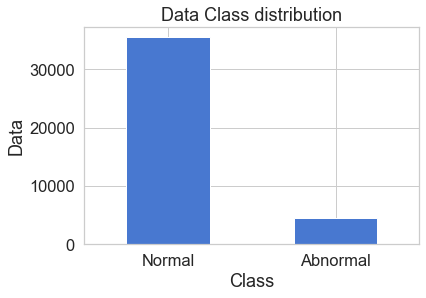

In [73]:
# Generate some sample data for the autoencoder
# x_train = np.random.rand(1000, 12)
# x_test = np.random.rand(100, 12)

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

# rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

df = pd.read_csv("Autoencoder_wind.csv")  
print(df.shape)

LABELS = ["Normal", "Abnormal"]

count_classes =pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Data Class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Data")
plt.show();

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from cmath import pi

data = df.drop(['Time'], axis=1)
y_true = df['Class']

r2d = 180/pi

data['P'] = r2d * data['P']
data['Q'] = r2d * data['Q']
data['R'] = r2d * data['R']
data['Phi'] = r2d * data['Phi']
data['Theta'] = r2d * data['Theta']
data['Psi'] = r2d * data['Psi']

In [74]:
X_train, X_test = train_test_split(data, test_size=0.5, shuffle=False, random_state=RANDOM_SEED)
X_train = X_train[X_train.Class == 0]
y_train = X_train['Class']
X_train = pd.DataFrame(X_train)
X_train = X_train.drop(['Class'], axis=1)

# X_test = X_test[X_test.Class == 0]
y_test = X_test['Class']
X_test = pd.DataFrame(X_test)
X_test = X_test.drop(['Class'], axis=1)

def MinmaxNorm(data1, data2, label):
    for i in label:
        a = data1[i]
        b = data2[i]
        x_max = max(a)
        x_min = min(a)
        for j in list(range(a.shape[0])):
            a.iloc[j] = (a.iloc[j] - x_min) / (x_max - x_min)
        for k in list(range(b.shape[0])):
            b.iloc[k] = (b.iloc[k] - x_min) / (x_max - x_min)
    
    return data1, data2

A = ['RPM1', 'RPM2', 'RPM3', 'RPM4', 'RPM5', 'RPM6', 'P', 'Q', 'R', 'Phi', 'Theta', 'Psi']

X_train, X_test = MinmaxNorm(X_train, X_test, A)

# Add noise 
# noise = 0.5
# X_train_noisy = X_train + noise * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
# X_test_noisy = X_test + noise * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

# X_train = X_train.values
# X_test = X_test.values

# X_train_noisy = X_train_noisy.values
# X_test_noisy = X_test_noisy.values

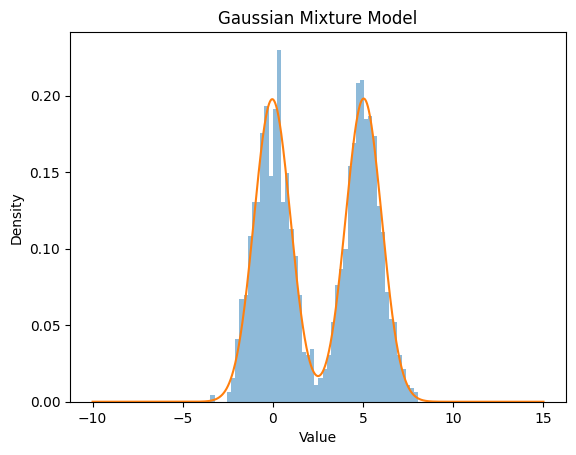

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Generate some sample data for the GMM
x = np.random.normal(size=1000)
x = np.concatenate((x, np.random.normal(loc=5, size=1000)))

# Fit a GMM with 2 components to the data
gmm = GaussianMixture(n_components=2)
gmm.fit(x.reshape(-1, 1))

# Plot the distribution of the GMM
x_range = np.linspace(-10, 15, 1000)
plt.hist(x, bins=50, density=True, alpha=0.5)
plt.plot(x_range, np.exp(gmm.score_samples(x_range.reshape(-1, 1))))
plt.title('Gaussian Mixture Model')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()
